# NLP (HW1)
## Persian Gender Recognition
## Authors: Nahal Mirzaie, Tahere Talaie
### Spring 1400

## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Clone Project from Github

In [ ]:
%cd drive/MyDrive

!git clone 'https://github.com/mirzanahal/Persian-Gender-Recognition'

### Install Requirement

In [ ]:
!pip install -r Persian-Gender-Recognition/requirement.txt

### Set Directory

In [ ]:
%cd Persian-Gender-Recognition/code

## Import 

In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from os.path import isfile

import config
import utils
import data_path
import data_loader

from classifier import Classifier
from feature_generator import generate_features

ModuleNotFoundError: No module named 'pandas'

## Load Datasets

In [2]:
embedding_features = pd.read_csv(os.path.join(data_path.))

### Check if auxilary datasets are created

In [3]:
if (not isfile(data_path.POSITIVE_WORDS_PATH)) or (not isfile(data_path.NEGATIVE_WORDS_PATH)):
    utils.import_positive_negative_words_from(
        path = data_path.EMOTION_LEXICON_WORDS_PATH,
        positive_words_path = data_path.POSITIVE_WORDS_PATH, 
        negative_words_path = data_path.NEGATIVE_WORDS_PATH
    )

## Generate Features

In [44]:
# features = (female_features.T).append(male_features.T)
# features

features = pd.read_csv('../data/embedded_texts_gensim.csv', index_col=0)
features

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F42,F43,F44,F45,F46,F47,F48,F49,number,label
0,0.024206,-0.030991,0.063560,-0.027825,-0.142699,-0.063065,0.550191,0.290295,-0.570920,0.007845,...,0.015025,0.061401,0.755231,0.097895,0.140288,-0.203445,-0.011071,0.107874,289,0
1,0.015821,-0.058928,-0.138164,-0.130736,-0.210562,-0.077056,0.431778,0.322096,-0.543762,-0.128959,...,-0.119066,0.055114,0.673321,-0.009909,0.348677,-0.278250,-0.124645,0.221547,504,0
2,0.033087,0.003720,-0.037134,-0.168871,-0.216493,-0.127261,0.465897,0.302000,-0.562811,-0.038416,...,0.031280,0.040302,0.750389,0.078986,0.174397,-0.394942,-0.105814,0.138139,262,0
3,-0.023201,-0.061457,0.071226,-0.171489,-0.276112,-0.046305,0.653391,0.308303,-0.576830,-0.047969,...,-0.021774,0.110298,0.788425,0.051916,0.147431,-0.375179,-0.191763,0.125181,276,0
4,-0.009515,0.020851,0.036604,-0.234346,-0.191233,-0.120807,0.531214,0.405674,-0.623234,-0.042082,...,-0.095156,0.043985,0.735413,0.027314,0.131712,-0.371022,-0.198262,0.174200,510,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.088987,-0.114888,-0.040703,-0.188127,-0.369964,-0.132450,0.460852,0.510442,-0.492156,-0.137568,...,-0.017311,0.032971,0.790379,-0.082957,0.259776,-0.312108,-0.203740,0.084736,247,1
996,-0.056202,0.009285,-0.082109,-0.026082,0.011627,-0.043360,0.153051,0.202540,-0.615147,-0.174317,...,-0.086618,-0.077725,0.745528,0.034032,0.572675,-0.309184,-0.250097,0.316528,521,1
997,0.052935,0.020912,-0.003834,-0.103795,-0.233529,-0.145466,0.330731,0.290801,-0.543016,-0.053961,...,-0.022735,-0.001817,0.625660,0.008426,0.189806,-0.308909,-0.137818,0.134111,509,1
998,-0.026432,-0.062982,0.033476,-0.177968,-0.292577,-0.112179,0.471462,0.335003,-0.610127,-0.195858,...,0.048597,0.066787,0.682924,0.133019,0.203664,-0.382289,-0.290352,0.202007,290,1


## Split X, y 

In [45]:
y = features['label']
X = features.drop(['label', 'number'], axis=1)

## Normalize

In [34]:

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Classification

In [35]:
classifier = Classifier('Random Forest', n_estimator=200, max_depth=100)
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.56701  | 0.604167 | 0.591398 | 0.484848 | 0.635417 | 0.63     | 0.530612 | 0.523364 | 0.5      | 0.669903 | 0.573672 |
| recall    | 0.544554 | 0.585859 | 0.533981 | 0.564706 | 0.592233 | 0.567568 | 0.547368 | 0.595745 | 0.62069  | 0.616071 | 0.576877 |
| f1        | 0.555556 | 0.594872 | 0.561224 | 0.521739 | 0.613065 | 0.597156 | 0.53886  | 0.557214 | 0.553846 | 0.64186  | 0.573539 |
| accuracy  | 0.56     | 0.605    | 0.57     | 0.56     | 0.615    | 0.575    | 0.555    | 0.555    | 0.565    | 0.615    | 0.5775   |


In [46]:
classifier = Classifier('SVM' , kernel='rbf', gamma='scale')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.558559 | 0.622642 | 0.588235 | 0.483333 | 0.631579 | 0.606838 | 0.55     | 0.554688 | 0.523438 | 0.669903 | 0.578921 |
| recall    | 0.613861 | 0.666667 | 0.582524 | 0.682353 | 0.582524 | 0.63964  | 0.694737 | 0.755319 | 0.770115 | 0.616071 | 0.660381 |
| f1        | 0.584906 | 0.643902 | 0.585366 | 0.565854 | 0.606061 | 0.622807 | 0.613953 | 0.63964  | 0.623256 | 0.64186  | 0.61276  |
| accuracy  | 0.56     | 0.635    | 0.575    | 0.555    | 0.61     | 0.57     | 0.585    | 0.6      | 0.595    | 0.615    | 0.59     |


In [48]:
classifier = Classifier('MLP', max_iter=1200 , hidden_layer_sizes=(8,4,), activation='relu', solver='adam')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.561905 | 0.617978 | 0.612903 | 0.5      | 0.62963  | 0.614035 | 0.555556 | 0.524272 | 0.505376 | 0.6125   | 0.573415 |
| recall    | 0.584158 | 0.555556 | 0.553398 | 0.670588 | 0.495146 | 0.630631 | 0.578947 | 0.574468 | 0.54023  | 0.4375   | 0.562062 |
| f1        | 0.572816 | 0.585106 | 0.581633 | 0.572864 | 0.554348 | 0.622222 | 0.56701  | 0.548223 | 0.522222 | 0.510417 | 0.563686 |
| accuracy  | 0.56     | 0.61     | 0.59     | 0.575    | 0.59     | 0.575    | 0.58     | 0.555    | 0.57     | 0.53     | 0.5735   |


In [38]:
classifier = Classifier('Naive Bayes')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.577778 | 0.5875   | 0.606061 | 0.45     | 0.651685 | 0.584158 | 0.578313 | 0.573034 | 0.5625   | 0.628205 | 0.579923 |
| recall    | 0.514851 | 0.474747 | 0.38835  | 0.423529 | 0.563107 | 0.531532 | 0.505263 | 0.542553 | 0.517241 | 0.4375   | 0.489867 |
| f1        | 0.544503 | 0.52514  | 0.473373 | 0.436364 | 0.604167 | 0.556604 | 0.539326 | 0.557377 | 0.538922 | 0.515789 | 0.529156 |
| accuracy  | 0.565    | 0.575    | 0.555    | 0.535    | 0.62     | 0.53     | 0.59     | 0.595    | 0.615    | 0.54     | 0.572    |


In [39]:
classifier = Classifier('Ada Boost', n_estimators= 120, learning_rate= 0.5)
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.510204 | 0.560748 | 0.557895 | 0.47619  | 0.602273 | 0.6      | 0.524752 | 0.544554 | 0.504673 | 0.62766  | 0.550895 |
| recall    | 0.49505  | 0.606061 | 0.514563 | 0.588235 | 0.514563 | 0.594595 | 0.557895 | 0.585106 | 0.62069  | 0.526786 | 0.560354 |
| f1        | 0.502513 | 0.582524 | 0.535354 | 0.526316 | 0.554974 | 0.597285 | 0.540816 | 0.564103 | 0.556701 | 0.572816 | 0.55334  |
| accuracy  | 0.505    | 0.57     | 0.54     | 0.55     | 0.575    | 0.555    | 0.55     | 0.575    | 0.57     | 0.56     | 0.555    |


## Feature Importance

In [34]:
classifier = Classifier('Random Forest', n_estimator=200)
classifier.fit(X, y)
feature_importance = classifier.model.feature_importances_

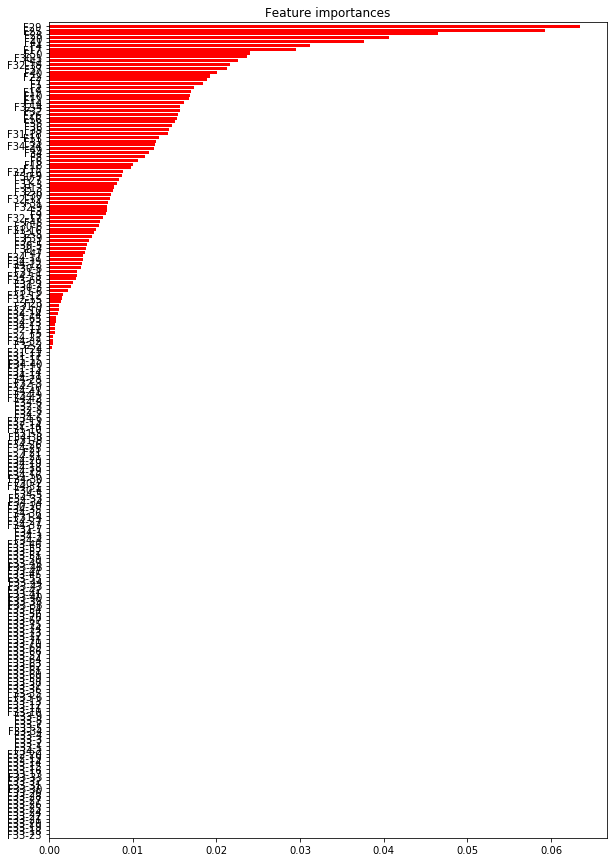

In [35]:
utils.plot_feature_importance(feature_importance, X)

In [90]:
features.to_csv ('../data/dataframe.csv', index = False, header=True)


## Split Train and Test

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)

In [90]:
svm = Classifier('SVM' , kernel='rbf', gamma='auto', probability=True)
train_predictions_svm = svm.fit(X_train, y_train)

In [91]:
rf = Classifier('Random Forest', n_estimator=200, max_depth=10)
train_predictions_rf = rf.fit(X_train, y_train)

In [92]:
mlp = Classifier('MLP', max_iter=1000 , hidden_layer_sizes=(4,8,), activation='relu', solver='adam')
train_predictions_mlp = mlp.fit(X_train, y_train)

In [93]:
adaboost = Classifier('Ada Boost', n_estimators= 120, learning_rate= 0.5)
train_predictions_adaboost = adaboost.fit(X_train, y_train)

In [94]:
nb = Classifier('Naive Bayes')
train_predictions_nb = nb.fit(X_train, y_train)

In [103]:
threshold = 0.5

train_prediction_labels_svm = np.array(train_predictions_svm[:,1] > threshold, dtype=int)
train_prediction_labels_rf = np.array(train_predictions_rf[:,1] > threshold, dtype=int)
train_prediction_labels_mlp = np.array(train_predictions_mlp[:,1] > threshold, dtype=int)
train_prediction_labels_ad = np.array(train_predictions_adaboost[:,1] > threshold, dtype=int)
train_prediction_labels_nb = np.array(train_predictions_nb[:,1] > threshold, dtype=int)

lsts = []
for i in range(len(train_prediction_labels_svm)):
    lsts.append(
        [
            train_prediction_labels_svm[i],
            train_prediction_labels_rf[i],
            train_prediction_labels_mlp[i],
            train_prediction_labels_ad[i],
            train_prediction_labels_nb[i]
        ]
    )

y_train_pred = [ max(lst, key=lst.count) for lst in lsts]

In [104]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80       818
         1.0       0.83      0.68      0.75       782

    accuracy                           0.77      1600
   macro avg       0.78      0.77      0.77      1600
weighted avg       0.78      0.77      0.77      1600

0.774375


In [143]:
test_predictions_svm = rf.predict(X_test)
test_predictions_rf = svm.predict(X_test)
test_predictions_ad = adaboost.predict(X_test)
test_predictions_nb = nb.predict(X_test)
test_predictions_mlp = mlp.predict(X_test)

test_prediction_labels_svm = np.array(test_predictions_svm[:,1] > threshold, dtype=int)
test_prediction_labels_rf = np.array(test_predictions_rf[:,1] > threshold, dtype=int)
test_prediction_labels_mlp = np.array(test_predictions_mlp[:,1] > threshold, dtype=int)
test_prediction_labels_ad = np.array(test_predictions_ad[:,1] > threshold, dtype=int)
test_prediction_labels_nb = np.array(test_predictions_nb[:,1] > threshold, dtype=int)

lsts = []
for i in range(len(test_prediction_labels_svm)):
    lsts.append(
        [
            # test_prediction_labels_svm[i],
            # test_prediction_labels_rf[i],
            test_prediction_labels_mlp[i],
            # test_prediction_labels_ad[i],
            # test_prediction_labels_nb[i]
        ]
    )

y_test_pred = [ max(lst, key=lst.count) for lst in lsts]

In [144]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.62      0.57       182
         1.0       0.62      0.53      0.57       218

    accuracy                           0.57       400
   macro avg       0.57      0.57      0.57       400
weighted avg       0.58      0.57      0.57       400

0.57


In [145]:
mlp.train(X, y)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.585106 | 0.552083 | 0.57     | 0.455556 | 0.579545 | 0.646465 | 0.515464 | 0.545455 | 0.480769 | 0.597701 | 0.552814 |
| recall    | 0.544554 | 0.535354 | 0.553398 | 0.482353 | 0.495146 | 0.576577 | 0.526316 | 0.510638 | 0.574713 | 0.464286 | 0.526333 |
| f1        | 0.564103 | 0.54359  | 0.561576 | 0.468571 | 0.534031 | 0.609524 | 0.520833 | 0.527473 | 0.52356  | 0.522613 | 0.537587 |
| accuracy  | 0.575    | 0.555    | 0.555    | 0.535    | 0.555    | 0.59     | 0.54     | 0.57     | 0.545    | 0.525    | 0.5545   |
